#Archisha Sinha

##Domain: Computer Vision
##Topic: Mean Shift Algorithm

## Experiment 8: Use mean shift algorithm to track an object in the given video.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
frames = []
count = 0 #will tell how many frames are stored
cap = cv2.VideoCapture('/content/humans.avi')
while True:
  ret,f = cap.read() #inbuilt function to read a video
  if f is not None:
    frames.append(f)
    count = count + 1
  else:
    break

In [ ]:
count

796

In [ ]:
len(frames)

796

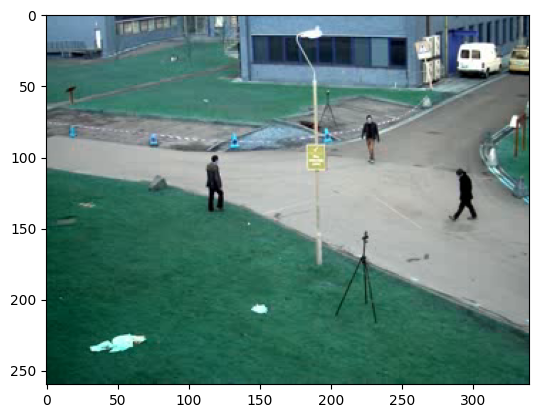

In [ ]:
plt.imshow(frames[0])

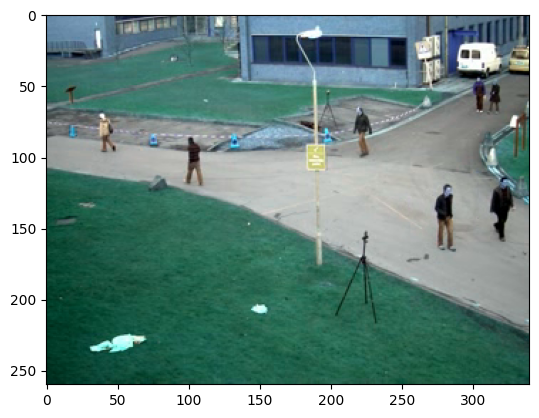

In [ ]:
plt.imshow(frames[200])

In [ ]:
cap = cv2.VideoCapture('/content/humans.avi')
ret,f = cap.read()
x, y, w, h = 210,70,40,50
cropped = f[y:y+h , x:x+w]
hsv_cropped = cv2.cvtColor(cropped,cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_cropped,np.array((0.,60.,32.)),np.array((180.,255.,255.)))
cropped_hist = cv2.calcHist([hsv_cropped],[0],mask,[180],[0,180])

h = hue = angle , s= saturation , v= gray level. s and v have values: 255,255

In [ ]:
from ctypes import c_void_p
cv2.normalize(cropped_hist, cropped_hist,0,255,cv2.NORM_MINMAX)
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,10,1)

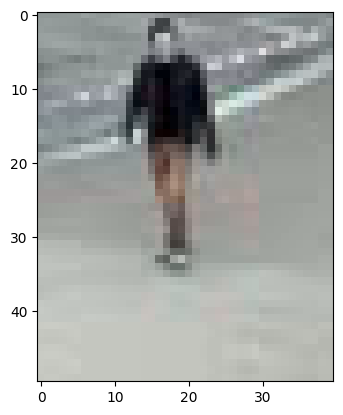

In [ ]:
plt.imshow(cropped)

In [ ]:
cap = cv2.VideoCapture('/content/humans.avi')
frames = []
for i in range(0, count):
  ret,f = cap.read()
  hsv_f = cv2.cvtColor(f,cv2.COLOR_BGR2HSV)
  search = cv2.calcBackProject([hsv_f],[0],cropped_hist,[0,180],1)
  track_window = (x,y,w,h)
  r , track_window = cv2.meanShift(search,track_window,criteria)
  image = cv2.rectangle(f,(x,y),(x+w,y+h),255,2)
  frames.append(image)

Text(0.5, 1.0, 'frame 15')

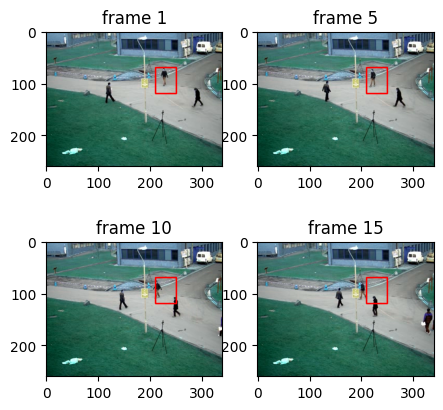

In [ ]:
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
plt.imshow(frames[1])
plt.title('frame 1')
plt.subplot(2,2,2)
plt.imshow(frames[5])
plt.title('frame 5')
plt.subplot(2,2,3)
plt.imshow(frames[10])
plt.title('frame 10')
plt.subplot(2,2,4)
plt.imshow(frames[15])
plt.title('frame 15')

#Conclusion:
* Back projection is used to determine the probabilities of the histogram matching between object and each frame of the sequence.
* These probabilities are used as data points for mean shaped algorithms. It segments out required object(person) in each frame.
* Therefore the motion of object can be tracked from frame to frame in the given video.

